In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Постановка проблемы

Предположим, к нам попали данные исследований нескольких (пусть n=3) вакцин;  
В каждом исследовании собирались данные о респондентах, с которых через 1 / 10 / 100 часов собирали оценку самочувствия  

In [2]:
respondents = 1000

def make_research():
  research = {
      "gender": np.random.randint(0,2,respondents),            # 0 - m, 1 - f
      "age": np.random.normal(25.0,20.0,respondents),
      "height": np.random.normal(170.0,15.5,respondents),
      "weight": np.random.normal(65.0,25.0,respondents)
      }

  feeled_bad = 0                                                # считаем, сколько всего людей ощутили себя плохо

  part = np.random.randint(7,20,1)                              # доля респондентов, которые будут подвержены плохому самочувствию
  feeled_bad += part

  research["condition_after_1"] = np.random.normal(
      (5 *                                                      # мат. ожидание сдвигается: если бы исследования и не было, в среднем все ставили бы ровно 5,
       (respondents * (1 - part/100)) +                         # но теперь 5 в среднем поставят меньшее число людей
       1 * (respondents * part/100))                            # остальные захотят поставить 1
      / respondents,

      2.0,
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 7 else -1       # будем считать, что люди более склонны иметь ухудшившееся самочувствие через какое-то время
  part = np.random.randint(
      7 - (got_better * 2),
      20 - (got_better * 5),
      1)
  feeled_bad += part

  research["condition_after_10"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      1.0,
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 3 else -1       # будем считать, что люди более склонны иметь улучшившееся самочувствие через продолжительное время
  part = np.random.randint(
      7 - (got_better * 3),
      20 - (got_better * 7),
      1)
  feeled_bad += part

  research["condition_after_100"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      2.5,
      respondents
      )

  return research

In [3]:
researh_0 = make_research()

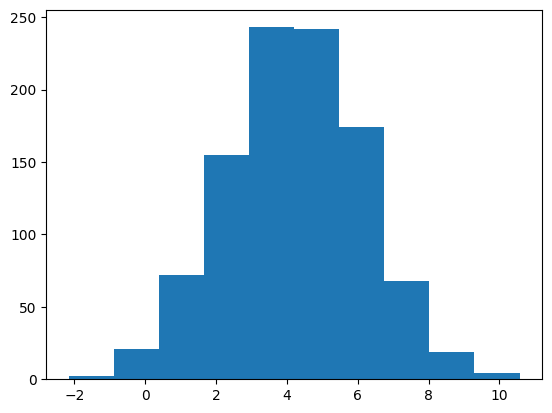

In [4]:
_ =plt.hist(researh_0["condition_after_1"])

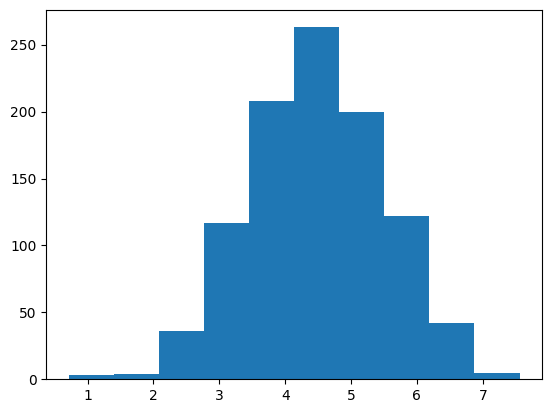

In [5]:
_ =plt.hist(researh_0["condition_after_10"])

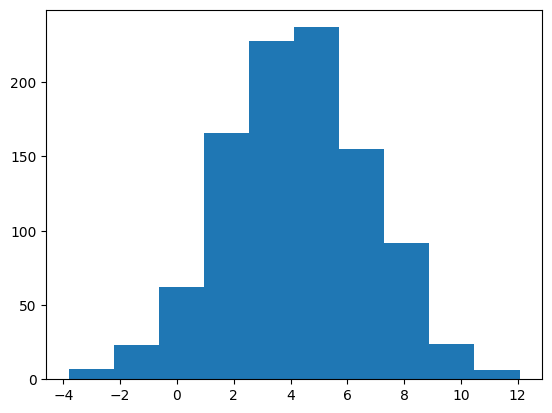

In [6]:
_ =plt.hist(researh_0["condition_after_100"])

# Задание

Мы хотим:
- проверить, что с данными все в порядке (т.к. данные генерили с помощью распределений, у нас могут быть отрицательные числа, которые надо исправить на 0, а также числа больше 10, которые надо исправить на 10) - построить гистограммы и почистить данные
- сравнить между собой результаты исследований разных вакцин и каким-либо образом представить сравнение исследований (т.е., к примеру, показать в одном пространстве сразу 3 исследования, пользуясь признаками "средняя оценка самочувствия после 1 часа", "средняя оценка самочувствия после 10 часов", "средняя оценка самочувствия после 100 часов"
- важно! обратите внимание на цвета, что вы используете

Чистим данные:

In [7]:
for result in range(len(researh_0["condition_after_1"])):
    if researh_0["condition_after_1"][result] > 10:
        researh_0["condition_after_1"][result] = 10
    if researh_0["condition_after_1"][result] < 0:
        researh_0["condition_after_1"][result] = 0
      
for result in range(len(researh_0["condition_after_10"])):
    if researh_0["condition_after_10"][result] > 10:
        researh_0["condition_after_10"][result] = 10
    if researh_0["condition_after_10"][result] < 0:
        researh_0["condition_after_10"][result] = 0

for result in range(len(researh_0["condition_after_100"])):
    if researh_0["condition_after_100"][result] > 10:
        researh_0["condition_after_100"][result] = 10
    if researh_0["condition_after_100"][result] < 0:
        researh_0["condition_after_100"][result] = 0

Строим гистограммы на исправленных данных:

(array([ 52.,  77., 132., 191., 202., 175., 100.,  47.,  17.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

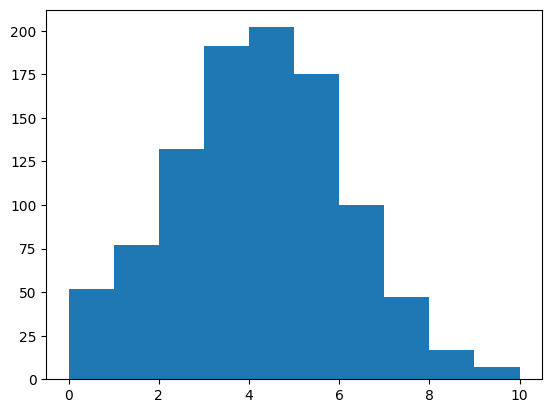

In [8]:
plt.hist(researh_0["condition_after_1"])

(array([  3.,   4.,  36., 117., 208., 263., 200., 122.,  42.,   5.]),
 array([0.71185723, 1.39651215, 2.08116706, 2.76582198, 3.4504769 ,
        4.13513181, 4.81978673, 5.50444164, 6.18909656, 6.87375148,
        7.55840639]),
 <BarContainer object of 10 artists>)

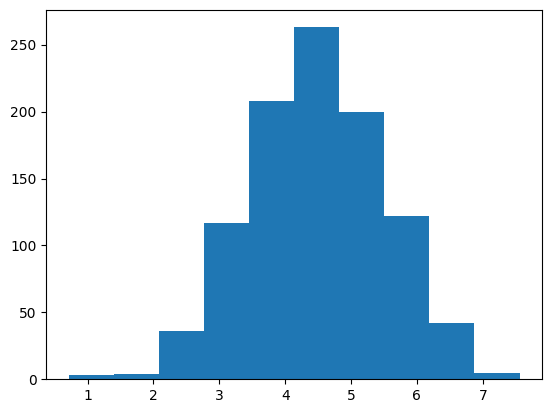

In [9]:
plt.hist(researh_0["condition_after_10"])

(array([ 96., 101., 120., 152., 175., 112., 103.,  74.,  41.,  26.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

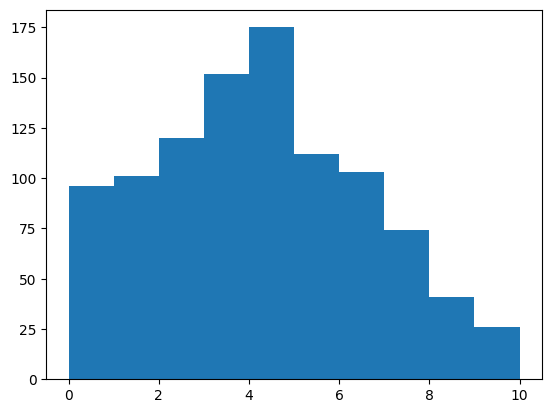

In [10]:
plt.hist(researh_0["condition_after_100"])

Сделаем простой барчарт по средним данным:

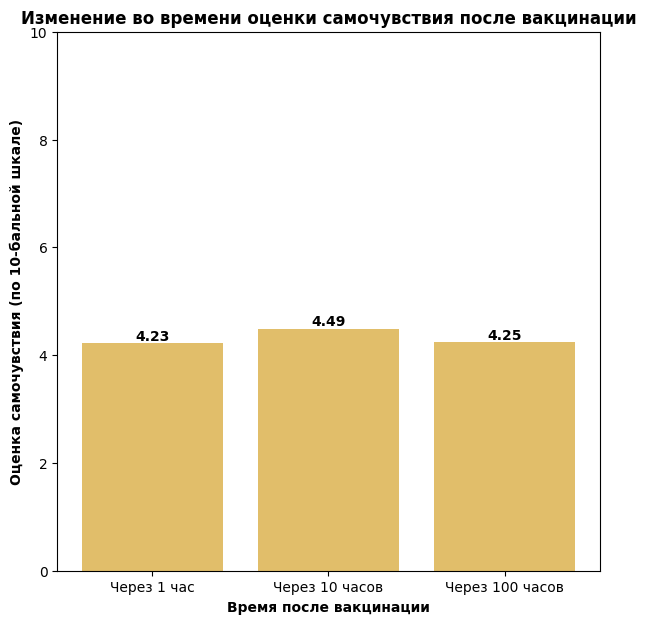

In [11]:
mean_1 = researh_0["condition_after_1"].mean()
mean_10 = researh_0["condition_after_10"].mean()
mean_100 = researh_0["condition_after_100"].mean()

means = [mean_1, mean_10, mean_100]

condition_names = ["Через 1 час", "Через 10 часов", "Через 100 часов"]

plt.rcParams["figure.figsize"] = (7,7) 

barchart = plt.bar(condition_names, means,  color="#E1BE6A")
plt.title("Изменение во времени оценки самочувствия после вакцинации", fontweight="bold")
plt.xlabel("Время после вакцинации", fontweight="bold")
plt.ylabel("Оценка самочувствия (по 10-бальной шкале)", fontweight="bold")
plt.ylim(0,10) #я решил сделать Y от 0 до 10, чтобы было четко видно, что оценка самочувствия проводилась по 10-бальной шкале 

#сделаем подписи для столбиков
for bar in barchart:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha="center", va="bottom", fontweight="bold")

Сделаем график оценки самочувствия в зависимости от пола:

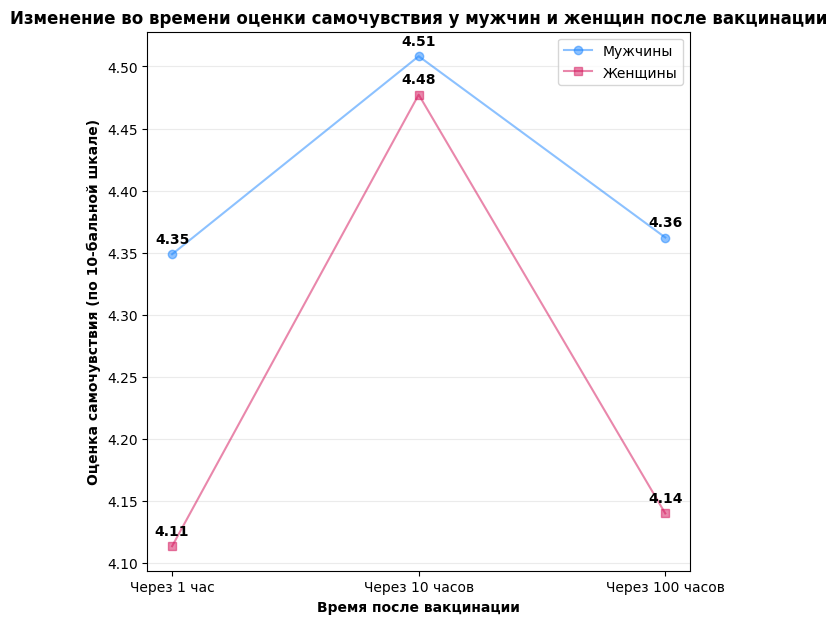

In [12]:
import pandas as pd

research_dataframe = pd.DataFrame(researh_0) #делаем датафрейм из наших данных

conditions = ["condition_after_1", "condition_after_10", "condition_after_100"]

male_mean_results = []
female_mean_results = []

for condition in conditions: 
    male_mean_results.append(research_dataframe[research_dataframe["gender"] == 0][condition].mean())
    female_mean_results.append(research_dataframe[research_dataframe["gender"] == 1][condition].mean())

plt.plot(condition_names, male_mean_results, color="#1A85FF", marker="o", label = "Мужчины", alpha = 0.5)
plt.plot(condition_names, female_mean_results, color="#D41159", marker="s", label = "Женщины", alpha = 0.5) 
#Я взял цвета, которые предлагаются в статье "Coloring for colorblindness"
plt.title("Изменение во времени оценки самочувствия у мужчин и женщин после вакцинации", fontweight="bold")
plt.xlabel("Время после вакцинации", fontweight="bold")
plt.ylabel("Оценка самочувствия (по 10-бальной шкале)", fontweight="bold")
plt.grid(axis = "y", alpha = 0.25)
plt.legend()

#Я попробовал сделать подписи для точек. 
#У меня получилось, но в некоторых случаях точки накладываются на линии и график становится плохо читаем. 
#Мне пока не удалось найти способ, как это можно было бы исправить. 
#В качестве "костыля" я решил сделать шрифт подписей жирным, а графики более прозрачными, чтобы текст лучше читался. 

for x, y in zip(condition_names, male_mean_results):
    plt.annotate(round(y, 2), (x, y), textcoords="offset points", xytext=(0,8), ha="center", fontweight="bold")

for x, y in zip(condition_names, female_mean_results):
    plt.annotate(round(y, 2), (x, y), textcoords="offset points", xytext=(0,8), ha="center", fontweight="bold")

Сделаем график по возрасту, но сперва проверим, есть ли у нас в данных такое, что возраст респондента отрицательный:

In [13]:
faulty_data = 0

for data in research_dataframe["age"]:
    if data < 0:
        faulty_data += 1
print(faulty_data)

99


Почистим данные от отрицательных возрастов:

In [14]:
research_dataframe = research_dataframe.drop(research_dataframe[research_dataframe.age < 0].index)

Разделим респондентов по возрастным группам:

In [15]:
def get_age_group(age):
    if age <= 14:
        return 1
    elif age <= 29:
        return 2
    elif age <= 59:
        return 3
    elif age > 59:
        return 4

research_dataframe["age_group"] = research_dataframe["age"].apply(get_age_group)

Сделаем график оценки самочувствия в зависимости от возраста:

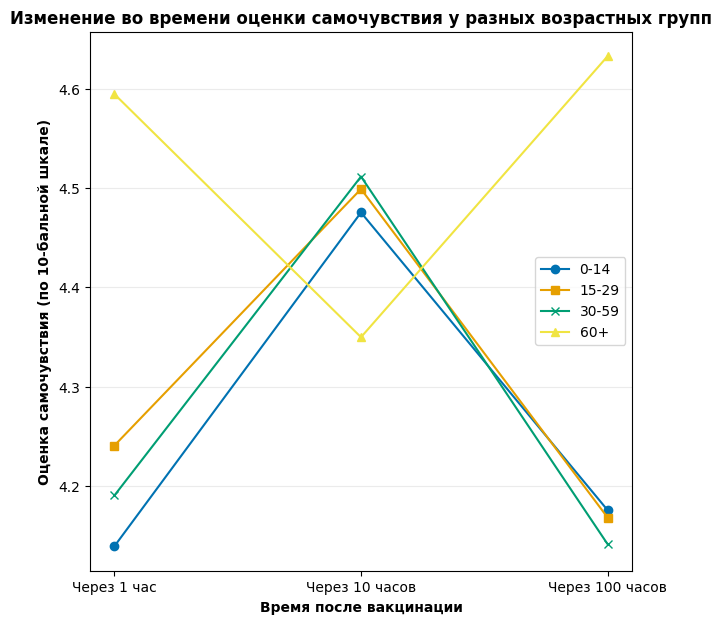

In [16]:
group1_mean_results = []
group2_mean_results = []
group3_mean_results = []
group4_mean_results = []

for condition in conditions: 
    group1_mean_results.append(research_dataframe[research_dataframe["age_group"] == 1][condition].mean())
    group2_mean_results.append(research_dataframe[research_dataframe["age_group"] == 2][condition].mean())
    group3_mean_results.append(research_dataframe[research_dataframe["age_group"] == 3][condition].mean())
    group4_mean_results.append(research_dataframe[research_dataframe["age_group"] == 4][condition].mean())

plt.plot(condition_names, group1_mean_results, color="#0072b2", marker="o", label = "0-14")
plt.plot(condition_names, group2_mean_results, color="#e69f00", marker="s", label = "15-29") 
plt.plot(condition_names, group3_mean_results, color="#009e73", marker="x", label = "30-59") 
plt.plot(condition_names, group4_mean_results, color="#f0e442", marker="^", label = "60+") 
#Я взял цветовую гамму Bang Wong, которая предлагается в статье "Coloring for colorblindness"

plt.title("Изменение во времени оценки самочувствия у разных возрастных групп", fontweight="bold")
plt.xlabel("Время после вакцинации", fontweight="bold")
plt.ylabel("Оценка самочувствия (по 10-бальной шкале)", fontweight="bold")
plt.grid(axis = "y", alpha = 0.25)
plt.legend()